In [ ]:
import numpy as np
import matplotlib.pyplot as plt   #Import usual libraries 

def creategrid(size):  #Creates the grid with '-' in places where the cell hasn't been entered
    return [['-' for _ in range(size)] for _ in range(size)]  #Based on grid size entered this will allow us to create the size

def printgrid(grid): #Prints the grid lines to divide cells. I added this after as it got a bit confusing which was which cell
    size = len(grid)
    for i in range(size): # We need 1 less line for each n game size hence why we use size - 1 
        print(" | ".join(grid[i])) # Solid lines for columns and dashed lines for rows
        if i < size - 1:
            print("-" * (4 * size - 1))

def validmove(grid, row, col): # We define another function that checks the validity of a move 
    size = len(grid)
    if row < 0 or row >= size or col < 0 or col >= size: # We can't have an entry greater than a row or column or if it is not adjacent which we describe in next function
        return False
    return grid[row][col] == '-' # Keeps the cell empty so we have not changed it again

def adjacent(prevrow, prevcol, row, col): # Defines 4 variables and basically ensures that either the row or column has changed by only 1 cell and no more
    return (abs(prevrow - row) == 1 and prevcol == col) or (abs(prevcol - col) == 1 and prevrow == row)

def main():  #Now we define the main game so the user can play it
    n = int(input("Enter the size of the grid (n x n): ")) # Input the size of the gridwhich sets up all the other functions
    grid = creategrid(n)  #Prints our grid and at all stages we update this so we can see what cells are filled
    printgrid(grid)

    startrow = int(input("Enter the starting row (0-index): ")) #Inputs the starting row and column for the game
    startcol = int(input("Enter the starting column (0-index): "))
    grid[startrow][startcol] = '1' # Places a 1 in this position
    print("Starting point set.")
    printgrid(grid)  # Grid is updated and printed out

    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)] # Defines the 4 moves that can occur in the game
    currentrow, currentcol = startrow, startcol # Takes the current row and column to be the end point of the last move
    movecount = 2
    while True:
        print("Current position: ({}, {})".format(currentrow, currentcol)) # Our current position is updated constantly after each go and I have used .format to insert this
        row = int(input("Enter the row for the next move: "))
        col = int(input("Enter the column for the next move: "))  # Enter row and columnn by user which works with valid move function

        if validmove(grid, row, col) and adjacent(currentrow, currentcol, row, col):
            grid[row][col] = str(movecount) #In order to print the next number in a cell we use the move counter to track this provided both of the other conditions are satisfied
            movecount += 1
            currentrow, currentcol = row, col #Update the previous row and column and then print out the new grid
            printgrid(grid)
        else:
            print("Invalid move! Try again.") # If this does not occur we say this is an invalid move
main() # Play the game!!

Enter the size of the grid (n x n):  2


- | -
-------
- | -


Enter the starting row (0-index):  0
Enter the starting column (0-index):  1


Starting point set.
- | 1
-------
- | -
Current position: (0, 1)


Enter the row for the next move:  1
Enter the column for the next move:  1


- | 1
-------
- | 2
Current position: (1, 1)


Enter the row for the next move:  1
Enter the column for the next move:  0


- | 1
-------
3 | 2
Current position: (1, 0)


Enter the row for the next move:  0
Enter the column for the next move:  0


4 | 1
-------
3 | 2
Current position: (0, 0)


Enter the size of the grid (n x n):  3


Total number of paths: 40
Number of solutions for each cell:
[8, 0, 8]
[0, 8, 0]
[8, 0, 8]


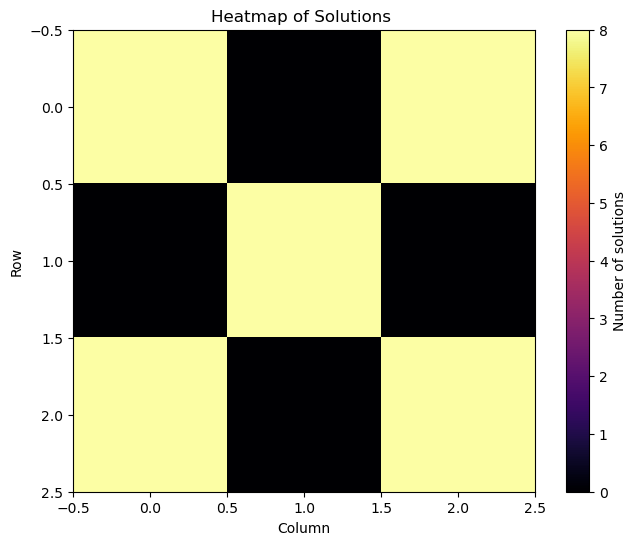

In [1]:
#First Test of doing Heat Maps with the answers
import numpy as np  #Import the usual libraries
import matplotlib.pyplot as plt  

def validmove(board, row, col, nrows, ncols, visited): #Very similar to above in regards of checking validity of moves
    return (row >= 0 and row < nrows and #We've added extra variable of we can't visit the same cell twice and the path can't overlap
            col >= 0 and col < ncols and
            not visited[row][col] and board[row][col] == 0)


def allpaths(board, row, col, nrows, ncols, visited): # If all cells are visited, we found a valid path and we can return a count of 1
    if all(all(cell for cell in row) for row in visited): # I had never used an all function before so this took a while to experiment with
        return 1  
    
    count = 0 # Starting count is at zero

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)] # Same directions as before that can be applied to each cell/
    for r, c in directions:
        currentrow, currentcol = row + r, col + c # We go through every single possibility at each cell and provided the valid move criteria is satsified this categorises as a move
        if validmove(board, currentrow, currentcol, nrows, ncols, visited): #Once every cell is visited we then can add on one to the total paths and try another
            visited[currentrow][currentcol] = True
            count += allpaths(board, currentrow, currentcol, nrows, ncols, visited) #If this does not occur, the computer backtracks itself to a new go to see if this works
            visited[currentrow][currentcol] = False  

    return count # The count is resturned so that later on we can make a total count of paths and individual count for each cell


def countpaths(board): # This function defines the actual count of paths and defines all the variables needed for the other functions
    nrows = len(board) #These are based off user input of n see below
    ncols = len(board[0])
    totalpaths = 0
    solutions = [[0] * ncols for _ in range(nrows)] # Keeps all solutions stored once we run through the for loop below

    for i in range(nrows): # Iterates through all the rows first
        for j in range(ncols): #Then iterates through all columns to get all possible starting positions
            if board[i][j] == 0:  # Start exploring from empty cells only
                visited = [[False] * ncols for _ in range(nrows)] # Checks whether a cell has been visited already to start with and then runs the function above to search for paths
                visited[i][j] = True
                cellpaths = allpaths(board, i, j, nrows, ncols, visited) # Records all cell paths for the individual square and then in matrix notation stores this.
                totalpaths += cellpaths #Keeps a total count of all cells
                solutions[i][j] = cellpaths

    return totalpaths, solutions # Return both the solutions and total paths


def heatmap(solutions): # I decided to create a heatmap to show all the solutions laid out and see if a pattern emerges
    solutionsforheatmap = np.array(solutions) #Stoes solutions as an array for use in the label of heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(solutionsforheatmap, cmap='inferno', interpolation='nearest')
    plt.colorbar(label='Number of solutions')
    plt.title('Heatmap of Solutions ') #Usual graph plotting labels and titles and colour scheme for heatmap
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.grid(False)
    plt.show()


def main(): #As before we now define the main game but this time there is less for the user to actually input
    n = int(input("Enter the size of the grid (n x n): ")) #User asked for size of game
    board = [[0] * n for _ in range(n)] # Creates a board this size for the game and is final variable for all the early functions
    
    totalpaths, solutions = countpaths(board) 

    print("Total number of paths:", totalpaths) #Print the total number of paths and soltions
    print("Number of solutions for each cell:")
    for row in solutions:
        print(row) #Prints in matrix format the solutions and then plots heat map

    heatmap(solutions)

    main() #Play the game!!!

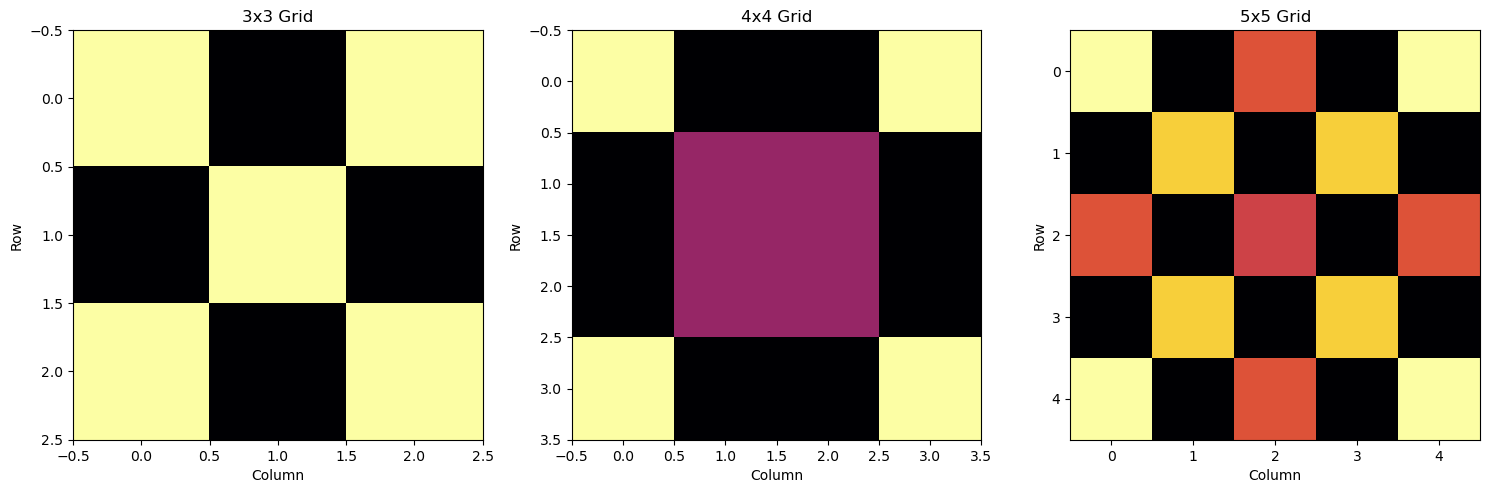

In [2]:
#Same code as above but I played around with plotting and varying different parameters 
import numpy as np  #Import the usual libraries
import matplotlib.pyplot as plt  

def validmove(board, row, col, nrows, ncols, visited): #Very similar to above in regards of checking validity of moves
    return (row >= 0 and row < nrows and #We've added extra variable of we can't visit the same cell twice and the path can't overlap
            col >= 0 and col < ncols and
            not visited[row][col] and board[row][col] == 0)


def allpaths(board, row, col, nrows, ncols, visited): # If all cells are visited, we found a valid path and we can return a count of 1
    if all(all(cell for cell in row) for row in visited): # I had never used an all function before so this took a while to experiment with
        return 1  
    
    count = 0 # Starting count is at zero

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)] # Same directions as before that can be applied to each cell/
    for r, c in directions:
        currentrow, currentcol = row + r, col + c # We go through every single possibility at each cell and provided the valid move criteria is satsified this categorises as a move
        if validmove(board, currentrow, currentcol, nrows, ncols, visited): #Once every cell is visited we then can add on one to the total paths and try another
            visited[currentrow][currentcol] = True
            count += allpaths(board, currentrow, currentcol, nrows, ncols, visited) #If this does not occur, the computer backtracks itself to a new go to see if this works
            visited[currentrow][currentcol] = False  

    return count # The count is resturned so that later on we can make a total count of paths and individual count for each cell


def countpaths(board): # This function defines the actual count of paths and defines all the variables needed for the other functions
    nrows = len(board) #These are based off user input of n see below
    ncols = len(board[0])
    totalpaths = 0
    solutions = [[0] * ncols for _ in range(nrows)] # Keeps all solutions stored once we run through the for loop below

    for i in range(nrows): # Iterates through all the rows first
        for j in range(ncols): #Then iterates through all columns to get all possible starting positions
            if board[i][j] == 0:  # Start exploring from empty cells only
                visited = [[False] * ncols for _ in range(nrows)] # Checks whether a cell has been visited already to start with and then runs the function above to search for paths
                visited[i][j] = True
                cellpaths = allpaths(board, i, j, nrows, ncols, visited) # Records all cell paths for the individual square and then in matrix notation stores this.
                totalpaths += cellpaths #Keeps a total count of all cells
                solutions[i][j] = cellpaths

    return totalpaths, solutions # Return both the solutions and total paths


def heatmap(ax, solutions, title):
    solutionsforheatmap = np.array(solutions) #Identical to before but we're setting up the labelling and converting solutions to an array
    ax.imshow(solutionsforheatmap, cmap='inferno', interpolation='nearest')
    ax.set_title(title)
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    ax.grid(False)


def main():
    fig, axs = plt.subplots(1, 3, figsize=(15, 5)) #Sets up a subplot with 3 graphs next to each other
    
    n = 3
    board = [[0] * n for _ in range(n)]       # 3x3 grid plot
    totalpaths, solutions = countpaths(board)
    heatmap(axs[0], solutions, '3x3 Grid')  

    n = 4
    board = [[0] * n for _ in range(n)]       # 4x4 grid plot
    totalpaths, solutions = countpaths(board)
    heatmap(axs[1], solutions, '4x4 Grid')

    n = 5
    board = [[0] * n for _ in range(n)]        # 5x5 grid plot
    totalpaths, solutions = countpaths(board)
    heatmap(axs[2], solutions, '5x5 Grid')

    plt.tight_layout() #Plots them all together
    plt.show()

    main() #Play the game!!!